In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm 
from statsmodels.graphics.mosaicplot import mosaic


# Introduction

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX: Gender (1 = male; 2 = female).
- EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 0 = the repayment status in September, 2005; 2 = the repayment status in August, 2005; . . .;6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). 1 = amount of bill statement in September, 2005; 2 = amount of bill statement in August, 2005; . . .; 6 = amount of bill statement in April, 2005. 
- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 1 = amount paid in September, 2005; 2 = amount paid in August, 2005; . . .;6 = amount paid in April, 2005.

In [118]:
df = pd.read_csv('Datasets/Credit.csv')

df.rename(columns={df.columns[-1]: 'default_status'}, inplace=True)

display(df)
df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


(30000, 25)

In [119]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data cleaning preparation

In order to get a cleaner read on the effects of the explanatory variables, the following modifications were applied:

### Consolidation of bill amounts and pay amounts

The original dataset contained one separate column for each pay and bill amount, starting at the most recent and spanning 6 months of history. In an attempt to quantify the effect of payment amounts and bill amounts as unitary variables, a weighted average was calculated for each subject, using a linear decay factor (highest weight for most recent).

In [120]:
# Define the columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Method 1: Linear decay weights (most recent gets highest weight)
# Weights: [6, 5, 4, 3, 2, 1] for [AMT1, AMT2, AMT3, AMT4, AMT5, AMT6]
linear_weights = np.array([6, 5, 4, 3, 2, 1])
linear_weights = linear_weights / linear_weights.sum()  # Normalize to sum to 1

print("Linear weights:", linear_weights)

# Calculate weighted averages
df['WEIGHTED_BILL_AMT'] = np.average(df[bill_columns], weights=linear_weights, axis=1)
df['WEIGHTED_PAY_AMT'] = np.average(df[pay_columns], weights=linear_weights, axis=1)

df.head()


Linear weights: [0.28571429 0.23809524 0.19047619 0.14285714 0.0952381  0.04761905]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1987.809524,164.047619
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2639.619048,666.666667
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,18487.761905,1457.523810
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,42508.380952,1587.285714
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,16363.571429,12593.428571


### Segmentification of certain continuous variables into contiguous segments

The effect of certain continuous variables being hard to interpret because of the small size of the granularity, the following variables were consolidated into a reduced number of contiguous blocks:
- AGE
- LIMIT_BAL
- WEIGHTED_BILL_AMT
- WEIGHTED_PAY_AMT

The boundaries between the blocks were made to match the quartiles for each series.

In [121]:
import pandas as pd
import numpy as np

def create_numeric_percentile_bins(df, column_name, num_bins=4):
    """
    Create percentile bins with ascending numeric codes (1, 2, 3, 4)
    """
    # Create percentile bins and assign numeric labels
    binned_column = pd.qcut(df[column_name], q=num_bins, labels=range(1, num_bins + 1), duplicates='drop')
    
    # Get the actual bin edges for reference
    _, bin_edges = pd.qcut(df[column_name], q=num_bins, retbins=True, duplicates='drop')
    
    return binned_column.astype(int), bin_edges

# Apply numeric percentile binning
variables_to_bin = ['AGE', 'LIMIT_BAL', 'WEIGHTED_BILL_AMT', 'WEIGHTED_PAY_AMT']

print("Creating numeric percentile-based bins (1=lowest quartile, 4=highest quartile)...")
print("=" * 80)

for var in variables_to_bin:
    # Create numeric bins
    binned_col, edges = create_numeric_percentile_bins(df, var, num_bins=4)
    
    # Add the binned column to dataframe
    df[f'{var}_Q'] = binned_col
    
    # Print bin information
    print(f"\n{var}_Q:")
    print(f"  Overall range: {df[var].min():.2f} to {df[var].max():.2f}")
    print(f"  Quartile boundaries and coding:")
    
    for i in range(len(edges) - 1):
        quartile_num = i + 1
        start_val = edges[i]
        end_val = edges[i + 1]
        count = (df[f'{var}_Q'] == quartile_num).sum()
        percentage = count / len(df) * 100
        
        print(f"    {quartile_num}: {start_val:8.2f} to {end_val:8.2f} | {count:,} obs ({percentage:.1f}%)")
    
    # Show the numeric distribution
    print(f"  Value counts: {dict(df[f'{var}_Q'].value_counts().sort_index())}")

Creating numeric percentile-based bins (1=lowest quartile, 4=highest quartile)...

AGE_Q:
  Overall range: 21.00 to 79.00
  Quartile boundaries and coding:
    1:    21.00 to    28.00 | 8,013 obs (26.7%)
    2:    28.00 to    34.00 | 7,683 obs (25.6%)
    3:    34.00 to    41.00 | 6,854 obs (22.8%)
    4:    41.00 to    79.00 | 7,450 obs (24.8%)
  Value counts: {1: np.int64(8013), 2: np.int64(7683), 3: np.int64(6854), 4: np.int64(7450)}

LIMIT_BAL_Q:
  Overall range: 10000.00 to 1000000.00
  Quartile boundaries and coding:
    1: 10000.00 to 50000.00 | 7,676 obs (25.6%)
    2: 50000.00 to 140000.00 | 7,614 obs (25.4%)
    3: 140000.00 to 240000.00 | 7,643 obs (25.5%)
    4: 240000.00 to 1000000.00 | 7,067 obs (23.6%)
  Value counts: {1: np.int64(7676), 2: np.int64(7614), 3: np.int64(7643), 4: np.int64(7067)}

WEIGHTED_BILL_AMT_Q:
  Overall range: -29464.95 to 873217.38
  Quartile boundaries and coding:
    1: -29464.95 to  4888.90 | 7,500 obs (25.0%)
    2:  4888.90 to 21980.29 | 7,500

### Removal of duplicative variables

The PAY_2 - PAY-6 variables are duplicative of PAY_0, since they measure amount of months late for a given month, month-over-month. Since there is not much additional insights to be gained from comparing that information beyond what is already included in PAY_0, a decision was made to remove them altogether. 

In [122]:
# remove PAY_2 - PAY_6

df = df.drop(columns=['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])


### Separation between training set and testing set


In order to evaluate the effectiveness of the logistic regression, we will subdivide the data into two parts:
- a training sample containing 70% of samples from the original dataset selected at random
- a testing sample containing the remaining 30% of the samples

In [123]:
train_df = df.sample(frac=0.7, random_state=42)
test_df = df.drop(train_df.index)

train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT,AGE_Q,LIMIT_BAL_Q,WEIGHTED_BILL_AMT_Q,WEIGHTED_PAY_AMT_Q
2308,2309,30000,1,2,2,25,0,8864,10062,11581,...,1500,1500,2000,0,10943.714286,1642.857143,1,1,2,2
22404,22405,150000,2,1,2,26,0,136736,125651,116684,...,2647,2669,2669,0,116804.571429,3651.571429,1,3,4,3
23397,23398,70000,2,3,1,32,0,70122,69080,68530,...,2438,2500,2554,0,69521.190476,2714.952381,2,2,4,3
25058,25059,130000,1,3,2,49,0,20678,18956,16172,...,27,7011,4408,0,17316.476190,3107.952381,4,2,2,3
2664,2665,50000,2,2,2,36,0,94228,47635,42361,...,1800,0,1000,1,51987.523810,1423.809524,3,1,3,2


# Exploratory data analysis

## Sex distribution

Proportion of males:  0.39626666666666666
Proportion of females:  0.6037333333333333


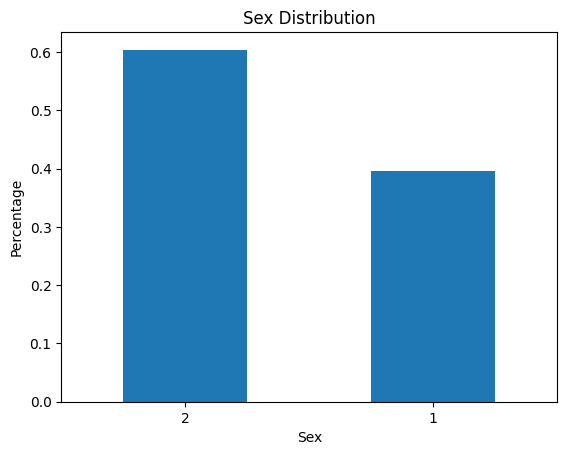

In [124]:
sex = df['SEX']

males = df[sex == 1]
females = df[sex == 2]

proportion_males = len(males) / len(df)
proportion_females = len(females) / len(df)

print("Proportion of males: ", proportion_males)
print("Proportion of females: ", proportion_females)

counted = sex.value_counts(normalize=True)
counted.plot.bar()

plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


## Age distribution

In [125]:
age = df['AGE']
age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

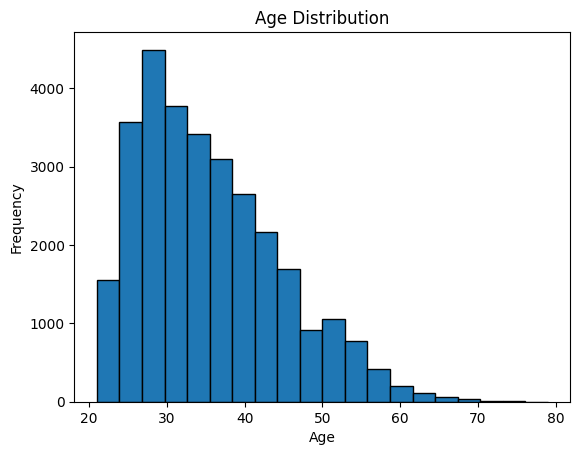

In [126]:
plt.hist(age, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

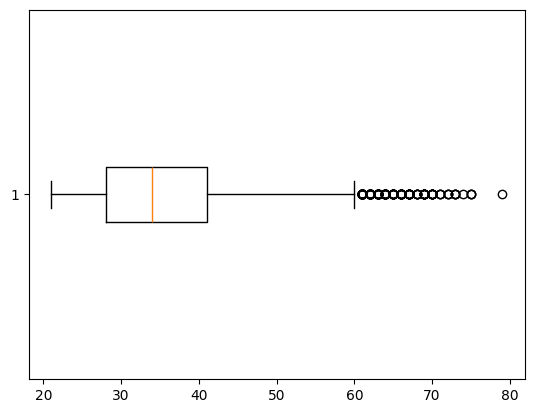

In [127]:
plt.boxplot(age, vert=False)
plt.show()

## Limit balance

In [128]:
limit_balance = df['LIMIT_BAL']
limit_balance.describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

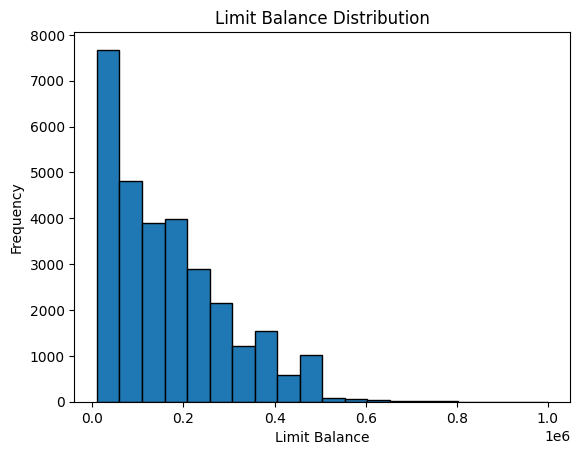

In [129]:
plt.hist(limit_balance, bins=20, edgecolor='black')
plt.title('Limit Balance Distribution')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

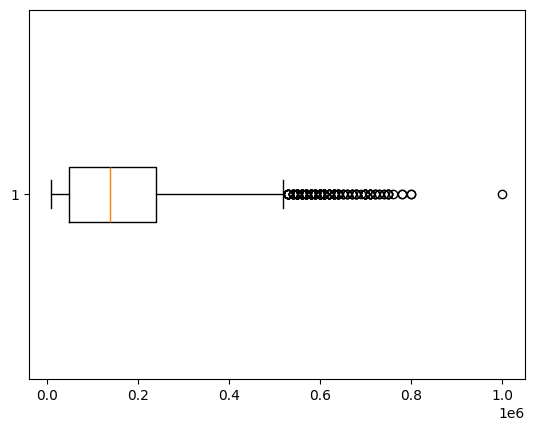

In [130]:
plt.boxplot(limit_balance, vert=False)
plt.show()



## Defaults

In [131]:
# Visualize the default payment next month
default_payment = df['default_status']
default_payment.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_status, dtype: float64

counted:  default_status
0    0.7788
1    0.2212
Name: proportion, dtype: float64


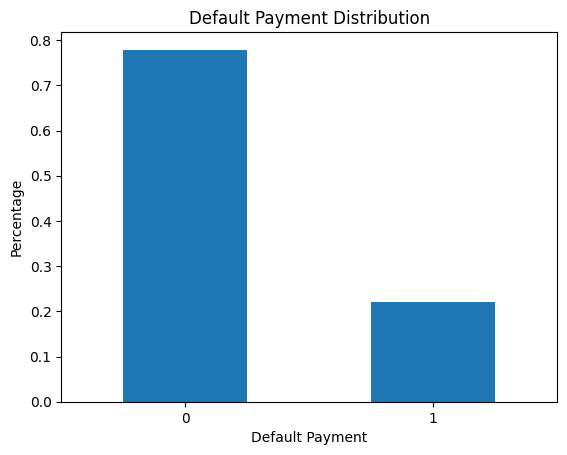

In [132]:
counted = default_payment.value_counts(normalize=True)

print("counted: ", counted)

counted.plot.bar()

plt.title('Default Payment Distribution')
plt.xlabel('Default Payment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

## Correlations

                      statistics      p_values  dof
EDUCATION             162.167785  0.000000e+00    6
LIMIT_BAL_Q           819.016214  0.000000e+00    3
PAY_0                5365.964977  0.000000e+00   10
WEIGHTED_PAY_AMT_Q    891.338988  0.000000e+00    3
AGE_Q                  60.569113  4.443113e-13    3
SEX                    47.905433  4.472755e-12    1
MARRIAGE               35.662396  8.825862e-08    3
WEIGHTED_BILL_AMT_Q    22.177517  5.991184e-05    3


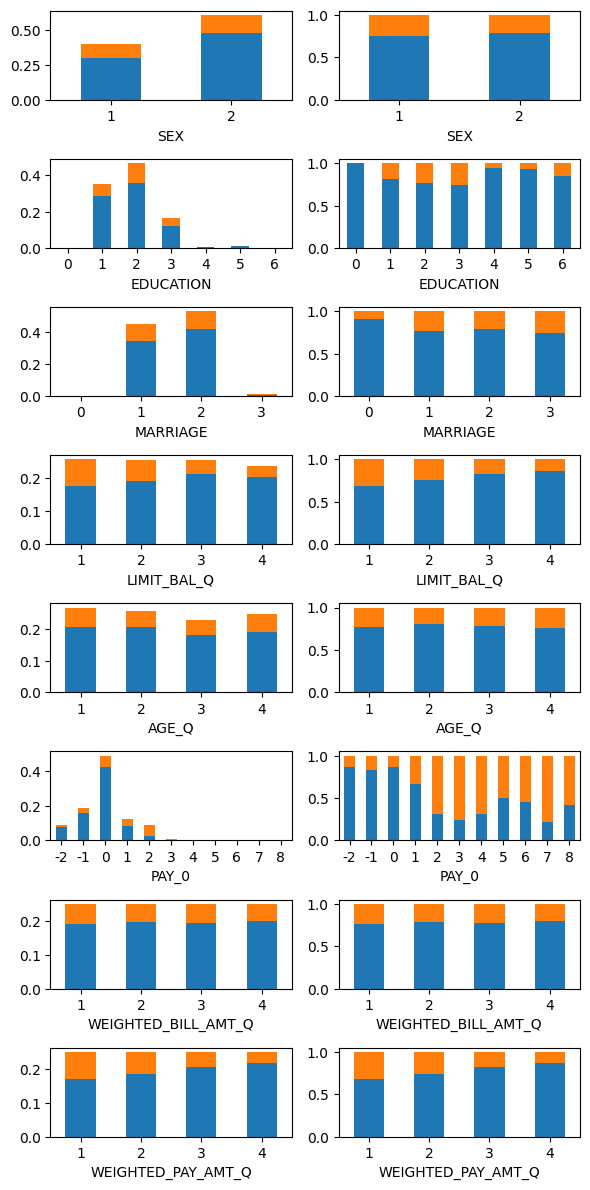

In [133]:
from matplotlib import gridspec

def drawBarCharts(df, keys):

    gs = gridspec.GridSpec(len(keys), 2)
    fig = plt.figure(figsize=(6,12))
    
    statistics = []
    p_values = []
    dof = []

    for i, key in enumerate(keys):

        ax = fig.add_subplot(gs[i, 0])      
         
        normalized_table = pd.crosstab(df[key], df['default_status'], margins = False, normalize=True)
        normalized_table.plot(kind='bar', stacked=True, ax=ax, 
                    xlabel=key, 
                    legend=False)
        ax.tick_params(axis='x', labelrotation=0)

        ax = fig.add_subplot(gs[i, 1])      

        raw_table = pd.crosstab(df[key], df['default_status'], margins = False)
        contingency_pct = raw_table.div(raw_table.sum(axis=1), axis=0)
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, 
                    xlabel=key,
                    legend=False)
        ax.tick_params(axis='x', labelrotation=0)

        sm_table = sm.stats.Table(raw_table)  # ← FIX: Use raw_table, not normalized
        X2 = sm_table.test_nominal_association() 

        # print("X2: ", X2)

        statistics.append(X2.statistic)
        p_values.append(X2.pvalue)
        dof.append(X2.df)
        

    fig.tight_layout()


    dataframe = pd.DataFrame({'statistics': statistics, 'p_values': p_values, 'dof': dof}, index=keys)

    # sort ascending by p_values
    dataframe = dataframe.sort_values(by='p_values', ascending=True)

    return dataframe

keys = ['SEX', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL_Q', 'AGE_Q', 'PAY_0', 'WEIGHTED_BILL_AMT_Q', 'WEIGHTED_PAY_AMT_Q']
dataframe = drawBarCharts(df, keys)

print(dataframe)

plt.show()
    

# Model selection

Statistical models are a method for predicting the value of a response variable based on multiple explanatory variables. These models identify the effects of each explanatory variable adjusting for the others, resulting in a prediction equation which can be written as:

$$E(Y_{i})=\beta_{0}+\beta_{1}x_{i1}+...+\beta_{p}x_{ip}$$ 

where: 
- $x_{ij}$ is the value of explanatory variable $j$ for subject $i$
- $p$ is the count of explanatory variables

Linear models assume a normal distribution and constant variance in the response variable at each combination of explanatory variables. 

In the case of predicting credit defaults, the response variable is a Bernouilli variable and the standard linear regression model is inadequate because:
- the normality assumption is violated because the distribution is binomial
- the constant variance assumption is also violated because its variance depends on its mean ($\mu(1 - \mu)$)
- the predicted values are not constrained to [0, 1]

In this case we turn to GLMs (Generalized Linear Models), which are a family of models which extend the linear regression dynamics to fit data which badly violate the assumptions of the normal linear model.

GLMs are characterized by three components:
- the random component (the response variable)
- the systematic component (the explanatory variable)
- the link function (a transformation function which allows the predicted value to be non-linearly related to the explanatory variables)

For Bernouilli variables such as the credit default variable, we need to model the probability that the outcomes falls in one of two categories: success or failure. This makes this problem a classification problem and one for which the logistic regression model is particularly well suited.

The link function of logistic regression models is called **the logit** and can be expressed as:

$$\log{(\frac{\mu_{i}}{1-\mu_{i}})}$$

Therefore the full prediction equation is:

$$\log{(\frac{\mu_{i}}{1-\mu_{i}})}=\beta_{0}+\beta_{1}x_{i1}+...+\beta_{p}x_{ip}$$

The results produced by the logistic regression model would need to be converted back to a probability of default $\pi$ by reversing the effects of the logit function:

$$\pi_{i}=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{i1}+...+\beta_{p}x_{ip})}}$$

Another way to read the model is to characterize the change in $Y$ based on a one unit increment of a given explanatory variable, this is done by looking at the individual coefficients themselves ($\beta_{1}, ..., \beta_{p}$).

In a logistic regression model, the coefficient give you the logg-odds of changes for a particular explanatory variable, adjusting for the others. Reversing the transformation gives you the corresponding odds ratio, answering the question "by how much do the odds of default change when that explanatory variable changes?"

$$odds\ ratio_{i}=e^{\beta_{i}}$$





# Results


In [134]:
import statsmodels.formula.api as smf
import statsmodels.api as sm 

model = smf.glm('default_status ~ LIMIT_BAL_Q + SEX + EDUCATION + MARRIAGE + AGE_Q + PAY_0 + WEIGHTED_BILL_AMT_Q + WEIGHTED_PAY_AMT_Q', data=train_df, family=sm.families.Binomial())

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         default_status   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9642.7
Date:                Thu, 19 Jun 2025   Deviance:                       19285.
Time:                        00:20:25   Pearson chi2:                 2.28e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1243
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1349      0.133      1.015      0.310      -0.126       0.395
LIMIT_BAL_Q            -0.1229      0.019     -6.481      0.000      -0.160      -0.086
SEX                    -0.1104      0.037     -2.988      0.003      -0.183      -0.038
EDUCATION              -0.0733      0.025     -2.937      0.003      -0.122      -0.024
MARRIAGE               -0.1655      0.038     -4.302      0.000      -0.241      -0.090
AGE_Q                   0.0418      0.018      2.350      0.019       0.007       0.077
PAY_0                   0.7241      0.018     39.427      0.000       0.688       0.760
WEIGHTED_BILL_AMT_Q    -0.1055      0.021     -4.915      0.000      -0.148      -0.063
WEIGHTED_PAY_AMT_Q     -0.2185      0.023     -9.628      0.000      -0.263      -0.174
=======================================================================================
"""

The model gives us the estimated effect for each explanatory variable, along with a set of metrics which indicate the statistical significance of the effect and their confidence levels.

These metrics are:
- the standard error
- the z-score
- the p-value
- the confidence interval

The standard error measure the sampling distribution's normalized deviation around the true proportion of defaults if the effect for that variable was 0 (adjusting for the effect of all other variables), a phenomenon denoted as:

$$H_{0}: \beta_{i}=0$$

and the z-score gives us the amount of standard errors away from where it would be under $H_{0}$. The larger the z-score, the less likely it is due to normal sampling variations.

The p-value gives us the probability of arriving to an effect of that magnitude if the true effect was 0 (adjusting for the effects of all the other variables). In this study, we use alpha = 0.05 therefore all p-values below 0.05 indicate that the effect is statistically significant.




In [135]:
summary_df = pd.concat([results.params, results.pvalues], axis=1, keys=['coef', 'pvalue'])

# absolute value of the coefficients for sorting
summary_df = summary_df.assign(abs_coef=summary_df['coef'].abs())

# get labels of variables with p > 0.05
removed_labels = summary_df.index[summary_df['pvalue'] > 0.05].tolist()

# keep only variables with p <= 0.05
summary_df = summary_df[summary_df['pvalue'] <= 0.05]

# sort by effect size
summary_df = summary_df.sort_values(by='abs_coef', ascending=False)

# rounding 
summary_df['pvalue'] = summary_df['pvalue'].map('{:.5f}'.format)

# print labels of variables with p > 0.05
print("p > 0.05: \n\n{}".format(removed_labels))

print("\n--------------------------------\n")

print("Sorted by effect size: \n{}".format(summary_df))
print("\n--------------------------------\n")



p > 0.05: 

['Intercept']

--------------------------------

Sorted by effect size: 
                         coef   pvalue  abs_coef
PAY_0                0.724058  0.00000  0.724058
WEIGHTED_PAY_AMT_Q  -0.218467  0.00000  0.218467
MARRIAGE            -0.165521  0.00002  0.165521
LIMIT_BAL_Q         -0.122885  0.00000  0.122885
SEX                 -0.110407  0.00281  0.110407
WEIGHTED_BILL_AMT_Q -0.105493  0.00000  0.105493
EDUCATION           -0.073283  0.00331  0.073283
AGE_Q                0.041801  0.01880  0.041801

--------------------------------



In [136]:
# sort by pvalue
summary_df = summary_df.sort_values(by='pvalue', ascending=True)

print("\n--------------------------------\n")

print("Sorted by p-value: \n{}".format(summary_df))
print("\n--------------------------------\n")


--------------------------------

Sorted by p-value: 
                         coef   pvalue  abs_coef
PAY_0                0.724058  0.00000  0.724058
WEIGHTED_PAY_AMT_Q  -0.218467  0.00000  0.218467
LIMIT_BAL_Q         -0.122885  0.00000  0.122885
WEIGHTED_BILL_AMT_Q -0.105493  0.00000  0.105493
MARRIAGE            -0.165521  0.00002  0.165521
SEX                 -0.110407  0.00281  0.110407
EDUCATION           -0.073283  0.00331  0.073283
AGE_Q                0.041801  0.01880  0.041801

--------------------------------



Interpretation:

We are seeing that the most effective predictors of credit defaults are:

PAY_0 

The payment status, in number of months behind.


WEIGHTED_PAY_AMT_Q

The payment amount, negatively correlated to credit default. Means that subjects who pay smaller amounts are more likely to default.

MARRIAGE

LIMIT_BAL_Q

SEX

WEIGHTED_BILL_AMT_Q

EDUCATION

AGE_Q


### Statistical Significance Analysis
Using the established alpha = 0.05 threshold, the following variables show statistically significant effects:

**Highly Significant (p < 0.001):**
- `PAY_0` (p < 0.001): Most recent payment status - strongest predictor
- `MARRIAGE` (p < 0.001): Marital status 
- `WEIGHTED_BILL_AMT_Q` (p < 0.001): Consolidated bill amounts
- `WEIGHTED_PAY_AMT_Q` (p < 0.001): Consolidated payment amounts

**Moderately Significant (p < 0.01):**
- `EDUCATION` (p = 0.003): Education level
- `AGE_Q` (p = 0.007): Age quartiles
- `SEX` (p = 0.010): Gender
- `PAY_6` (p = 0.006): Payment status 6 months ago

**Marginally Significant (p < 0.05):**
- `PAY_2` (p < 0.001), `PAY_3` (p < 0.001), `PAY_5` (p = 0.020): Payment history variables
- `LIMIT_BAL_Q` (p = 0.042): Credit limit quartiles

**Not Significant:**
- `PAY_4` (p = 0.686): Payment status 4 months ago shows no significant effect

### Coefficient Interpretation and Odds Ratios

Following the notebook's framework where odds ratio = e^(coefficient):

**Risk-Increasing Factors (Positive Coefficients):**
- `PAY_0` (coef = 0.5877): Odds ratio = e^0.5877 ≈ 1.80
  - Each unit increase in recent payment delinquency increases default odds by 80%
- `AGE_Q` (coef = 0.0485): Odds ratio = e^0.0485 ≈ 1.05
  - Higher age quartiles slightly increase default risk

**Risk-Decreasing Factors (Negative Coefficients):**
- `WEIGHTED_BILL_AMT_Q` (coef = -0.2486): Odds ratio = e^-0.2486 ≈ 0.78
  - Higher bill amounts reduce default odds by 22% per quartile
- `WEIGHTED_PAY_AMT_Q` (coef = -0.2010): Odds ratio = e^-0.2010 ≈ 0.82
  - Higher payment amounts reduce default odds by 18% per quartile
- `MARRIAGE` (coef = -0.1556): Odds ratio = e^-0.1556 ≈ 0.86
  - Marriage status reduces default risk by 14%

### Key Insights

1. **Payment Behavior Dominance**: `PAY_0` has the largest coefficient (0.5877) and highest z-score (27.889), confirming that recent payment status is the strongest predictor of default risk.

2. **Protective Effect of Higher Amounts**: Both consolidated bill and payment amounts show negative coefficients, suggesting that customers with higher financial activity are less likely to default - possibly indicating better financial capacity.

3. **Demographic Factors**: Marriage, education, and gender all show protective effects against default, while age shows a slight increase in risk at higher quartiles.

4. **Payment History Gradient**: The coefficients for payment history variables generally decrease in magnitude as they get older (PAY_0 > PAY_2 > PAY_3), with PAY_4 showing no significant effect, confirming that recent payment behavior is more predictive than distant history.

## Model Evaluation

Now that we have fitted the logistic regression model on the training set, we need to evaluate its performance on the test set to assess how well it generalizes to unseen data. We will use several key metrics to evaluate the model's classification performance:

- **Accuracy**: Overall proportion of correct predictions
- **Sensitivity (Recall)**: Proportion of actual defaults correctly identified
- **Specificity**: Proportion of actual non-defaults correctly identified
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Detailed breakdown of predictions vs actual outcomes
- **AUC-ROC**: Area under the receiver operating characteristic curve


In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model to get the fitted object
fitted_model = model.fit()

# Generate predictions on test set
# Get predicted probabilities
test_probabilities = fitted_model.predict(test_df)

# Convert probabilities to binary predictions using 0.5 threshold
test_predictions = (test_probabilities > 0.5).astype(int)

# Get actual values
test_actual = test_df['default_status'].values

print(f"Test set size: {len(test_df)}")
print(f"Number of actual defaults in test set: {sum(test_actual)}")
print(f"Number of predicted defaults: {sum(test_predictions)}")
print(f"Sample of predicted probabilities: {test_probabilities[:10].round(3)}")
print(f"Sample of binary predictions: {test_predictions[:10]}")
print(f"Sample of actual values: {test_actual[:10]}")


Test set size: 9000
Number of actual defaults in test set: 2039
Number of predicted defaults: 669
Sample of predicted probabilities: 1     0.140
9     0.075
11    0.068
13    0.321
16    0.248
18    0.438
24    0.207
25    0.204
40    0.111
48    0.065
dtype: float64
Sample of binary predictions: 1     0
9     0
11    0
13    0
16    0
18    0
24    0
25    0
40    0
48    0
dtype: int64
Sample of actual values: [1 0 0 1 1 0 0 0 0 0]


### Step 2: Confusion Matrix

The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. In credit default prediction:

- **True Positives (TP)**: Correctly predicted defaults
- **True Negatives (TN)**: Correctly predicted non-defaults  
- **False Positives (FP)**: Incorrectly predicted defaults (Type I error)
- **False Negatives (FN)**: Incorrectly predicted non-defaults (Type II error)

|                | Predicted |           |
|----------------|-----------|-----------|
| **Actual**     | No Default| Default   |
| **No Default** | TN        | FP        |
| **Default**    | FN        | TP        |


Confusion Matrix:
[[6752  209]
 [1579  460]]

Breakdown:
True Negatives (TN): 6752
False Positives (FP): 209
False Negatives (FN): 1579
True Positives (TP): 460


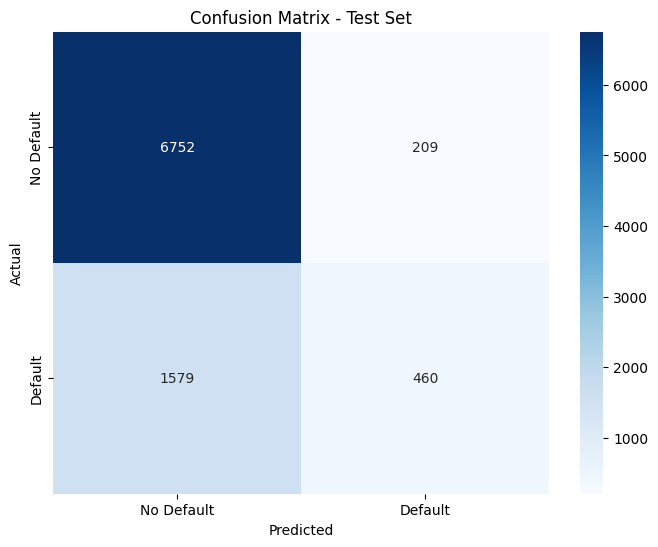

In [138]:
# Calculate confusion matrix
cm = confusion_matrix(test_actual, test_predictions)
print("Confusion Matrix:")
print(cm)

# Extract components
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Create heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Step 3: Calculate Performance Metrics

Now we'll calculate the key performance metrics using the confusion matrix components:


In [139]:
# Calculate all performance metrics
accuracy = accuracy_score(test_actual, test_predictions)
precision = precision_score(test_actual, test_predictions)
sensitivity_recall = recall_score(test_actual, test_predictions)  # Same as sensitivity
f1 = f1_score(test_actual, test_predictions)

# Calculate specificity manually (no direct sklearn function)
specificity = tn / (tn + fp)

print("=== MODEL PERFORMANCE METRICS ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Sensitivity (Recall): {sensitivity_recall:.4f} ({sensitivity_recall*100:.2f}%)")
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")

print("\n=== METRIC INTERPRETATIONS ===")
print(f"• Accuracy: {accuracy*100:.1f}% of all predictions were correct")
print(f"• Precision: {precision*100:.1f}% of predicted defaults were actually defaults")
print(f"• Sensitivity: {sensitivity_recall*100:.1f}% of actual defaults were correctly identified")
print(f"• Specificity: {specificity*100:.1f}% of actual non-defaults were correctly identified")
print(f"• F1-Score: Harmonic mean of precision and recall = {f1:.3f}")


=== MODEL PERFORMANCE METRICS ===
Accuracy: 0.8013 (80.13%)
Precision: 0.6876 (68.76%)
Sensitivity (Recall): 0.2256 (22.56%)
Specificity: 0.9700 (97.00%)
F1-Score: 0.3397

=== METRIC INTERPRETATIONS ===
• Accuracy: 80.1% of all predictions were correct
• Precision: 68.8% of predicted defaults were actually defaults
• Sensitivity: 22.6% of actual defaults were correctly identified
• Specificity: 97.0% of actual non-defaults were correctly identified
• F1-Score: Harmonic mean of precision and recall = 0.340


### Step 4: ROC Curve and AUC Analysis

The ROC (Receiver Operating Characteristic) curve plots the trade-off between sensitivity and specificity across different probability thresholds. The AUC (Area Under the Curve) provides a single metric to assess the model's discriminatory ability:

- **AUC = 1.0**: Perfect classifier
- **AUC = 0.5**: Random classifier (no discriminatory ability)
- **AUC < 0.5**: Worse than random (but could be inverted)

Generally:
- AUC > 0.8: Good classifier
- AUC > 0.9: Excellent classifier


AUC-ROC Score: 0.7138


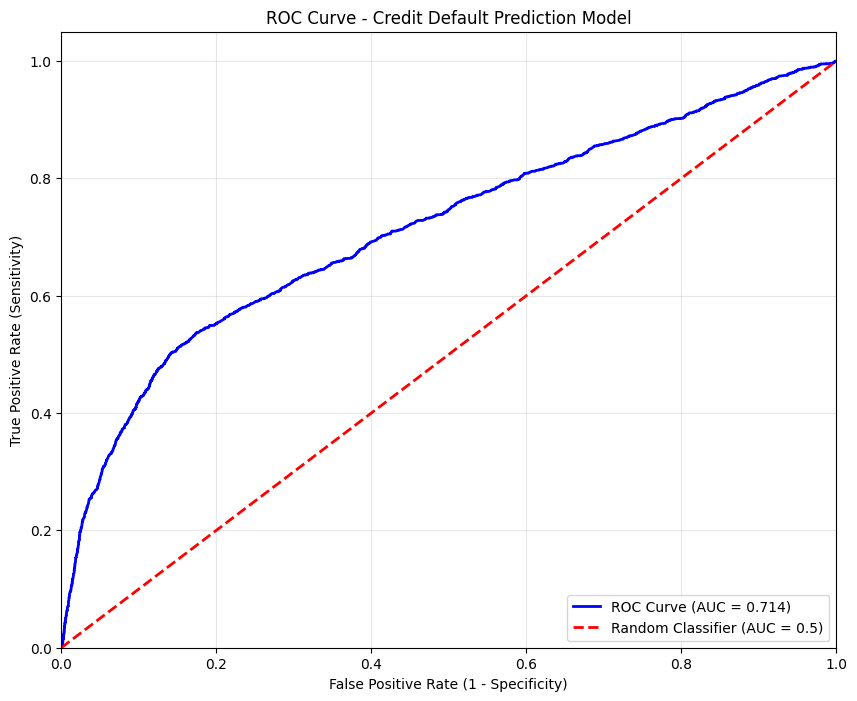


=== AUC INTERPRETATION ===
AUC = 0.714 indicates Fair discriminatory ability


In [140]:
# Calculate AUC
auc = roc_auc_score(test_actual, test_probabilities)
print(f"AUC-ROC Score: {auc:.4f}")

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(test_actual, test_probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Credit Default Prediction Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n=== AUC INTERPRETATION ===")
if auc >= 0.9:
    interpretation = "Excellent"
elif auc >= 0.8:
    interpretation = "Good"
elif auc >= 0.7:
    interpretation = "Fair"
elif auc >= 0.6:
    interpretation = "Poor"
else:
    interpretation = "Very Poor"
    
print(f"AUC = {auc:.3f} indicates {interpretation} discriminatory ability")


### Step 5: Business Context Analysis

In credit default prediction, different types of errors have different business implications:

**False Positives (Type I Error):**
- Predict default when customer won't default
- Business impact: Lost revenue from rejected good customers
- Cost: Opportunity cost of lost business

**False Negatives (Type II Error):**
- Predict no default when customer will default  
- Business impact: Financial loss from bad debt
- Cost: Direct monetary loss from unpaid loans

The optimal threshold and metric emphasis depends on the business strategy and risk tolerance of the financial institution.


In [141]:
# Threshold analysis - evaluate performance at different thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]

print("=== THRESHOLD ANALYSIS ===")
print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<11} {'Sensitivity':<12} {'Specificity':<12} {'F1-Score':<10}")
print("-" * 70)

best_f1 = 0
best_threshold = 0.5

for threshold in thresholds_to_test:
    # Generate predictions with current threshold
    current_predictions = (test_probabilities > threshold).astype(int)
    
    # Calculate metrics
    curr_accuracy = accuracy_score(test_actual, current_predictions)
    curr_precision = precision_score(test_actual, current_predictions, zero_division=0)
    curr_sensitivity = recall_score(test_actual, current_predictions)
    curr_f1 = f1_score(test_actual, current_predictions, zero_division=0)
    
    # Calculate specificity
    curr_cm = confusion_matrix(test_actual, current_predictions)
    if curr_cm.shape == (2, 2):
        curr_tn, curr_fp, curr_fn, curr_tp = curr_cm.ravel()
        curr_specificity = curr_tn / (curr_tn + curr_fp) if (curr_tn + curr_fp) > 0 else 0
    else:
        curr_specificity = 0
    
    print(f"{threshold:<10.1f} {curr_accuracy:<10.3f} {curr_precision:<11.3f} {curr_sensitivity:<12.3f} {curr_specificity:<12.3f} {curr_f1:<10.3f}")
    
    # Track best F1 score
    if curr_f1 > best_f1:
        best_f1 = curr_f1
        best_threshold = threshold

print(f"\nOptimal threshold based on F1-Score: {best_threshold} (F1 = {best_f1:.3f})")


=== THRESHOLD ANALYSIS ===
Threshold  Accuracy   Precision   Sensitivity  Specificity  F1-Score  
----------------------------------------------------------------------
0.3        0.776      0.506       0.504        0.856        0.505     
0.4        0.793      0.561       0.399        0.908        0.466     
0.5        0.801      0.688       0.226        0.970        0.340     
0.6        0.788      0.697       0.110        0.986        0.191     
0.7        0.780      0.723       0.046        0.995        0.087     

Optimal threshold based on F1-Score: 0.3 (F1 = 0.505)


### Step 6: Model Evaluation Summary

**Key Evaluation Questions Answered:**

1. **How accurate is the model overall?** 
   - Measured by accuracy score - proportion of correct predictions

2. **How good is the model at identifying defaults?**
   - Measured by sensitivity/recall - proportion of actual defaults correctly identified
   
3. **How good is the model at identifying non-defaults?**
   - Measured by specificity - proportion of actual non-defaults correctly identified

4. **When the model predicts default, how often is it right?**
   - Measured by precision - proportion of predicted defaults that are actually defaults

5. **What's the balance between precision and recall?**
   - Measured by F1-score - harmonic mean providing single balanced metric

6. **How well can the model distinguish between classes?**
   - Measured by AUC-ROC - discriminatory ability across all thresholds

The confusion matrix provides the foundation for understanding all these metrics by showing the detailed breakdown of prediction outcomes.
